In [33]:
import pandas as pd
import numpy as np
import random
import datetime
import csv
import numpy as np
import matplotlib.pyplot as plt
import calculator
import math

# Prepare global variable

In [5]:
class Generator:

    def __init__(self, num_of_line: int):

        self.num_of_line = num_of_line
        
        # Prepare columns
        self.columns = ["firstname", "lastname", "middlename", "sex", "birthdate", "country", "university"]

        # Prepare data
        self.firstname = ["Loc", "Chino", "An", "Chi", "Peter", "Parker", "Ha", 
                          "Harry", "Curry", "Thompson", "Nhi", "Tuyet"]
        self.lastname = ["Nguyen", "Kokoto", "Le", "Lai", "Parker", "Peter", 
                         "Hoang", "Potter", "Stephen", "Klay", "Vo"]
        self.middlename = ["Duc", "Capu", "Bao", "Trong", "Spiderman", "Tom", "Thu", 
                           "Lily", "Thanh", "Tram", "Gopal", "Michael"]

        self.sex_ = ["male", "female"]

        self.start_date = datetime.date(1975, 4, 30)
        self.end_date = datetime.date(2010, 1, 1)

        self.countries = ["US", "VN", "China", "Japan", "Hongkong", "Taiwan", 
                          "Lao", "Campuchia", "New-zeland", "Australia"]

        self.universities = ["HCM University of Science", "Stanford University", "Cambridge University", 
                             "HCM University of Technology", "CMU", "MIU", "Portland State University"]
            
    def generate_name(self) -> tuple:
        first = random.randint(0, len(self.firstname) - 1)
        last = random.randint(0, len(self.lastname) - 1)
        middle = random.randint(0, len(self.middlename) - 1)

        return (self.firstname[first], self.lastname[last], self.middlename[middle])

    def generate_sex(self) -> str:
        return self.sex_[random.randint(0, 1)]

    def generate_birthdate(self) -> str:
        random_number_of_days = random.randrange((self.end_date - self.start_date).days)
        random_date = self.start_date + datetime.timedelta(days=random_number_of_days)
        return random_date.strftime("%m/%d/%Y")
    
    def generate_country(self) -> str:
        return self.countries[random.randint(0, len(self.countries) - 1)]

    def generate_university(self) -> list:
        return self.universities[random.randint(0, len(self.universities) - 1)]

    def to_csv(self, file_name: str):
        with open(file=file_name, mode="w", encoding="utf-8") as writer:
            writer.write(",".join(self.columns) + "\n")

            for row in range(0, self.num_of_line):
                ID = row
                firstname, lastname, middlename = self.generate_name()
                sex = self.generate_sex()
                birthdate = self.generate_birthdate()
                country = self.generate_country()
                university = self.generate_university()

                writer.write(",".join([firstname, 
                                       lastname, 
                                       middlename, 
                                       sex, 
                                       birthdate, 
                                       country, 
                                       university]) + "\n")


sizes = [10]
for milestone in [10, 100, 1000, 10000, 100000]:
    for step in range(2, 11):
        sizes.append(step * milestone)
        
input_filenames = []
output_filenames = []

for size_ in sizes:
    input_filename = f"sample/input-{size_}.csv"
    output_filename = f"sample/output-{size_}.csv"
    
    input_filenames.append(input_filename)
    output_filenames.append(output_filename)

# Generate csv files in /sample/...

In [3]:
for index, size_ in enumerate(sizes):
    
    input_filename = input_filenames[index]
    output_filename = output_filenames[index]
    
    generator = Generator(size_)
    generator.to_csv(input_filename)

# Support functions

In [3]:
class PandasCalculator():
        
    def reading_performance(self, 
                            file_name: str, 
                            read_as_dictionaries=False):
        
        start = datetime.datetime.now()
        
        if read_as_dictionaries:
            data = pd.read_csv(file_name).to_dict(orient="records")
        else:
            data = pd.read_csv(file_name)
        
        end = datetime.datetime.now()
        return (end - start).total_seconds()
    
    def writing_performance(self, 
                            source_name: str, 
                            output_name: str, 
                            write_as_dictionaries=False):
        
        if write_as_dictionaries:
            data = pd.read_csv(source_name).to_dict(orient="records")
            start = datetime.datetime.now()
            pd.DataFrame(data).to_csv(output_name)
        else:
            data = pd.read_csv(source_name)
            start = datetime.datetime.now()
            data.to_csv(output_name)
            
        end = datetime.datetime.now()
        return (end - start).total_seconds()
    
class CsvCalculator():
    
    def reading_performance(self, 
                            file_name: str, 
                            read_as_dictionaries=False):
        
        start = datetime.datetime.now()
        with open(file_name, mode="r") as csv_file:
            if read_as_dictionaries:
                csv_writer = csv.DictReader(csv_file)
            else:
                csv_writer = csv.reader(csv_file)
                
            for line in csv_writer:
                pass
        
        end = datetime.datetime.now()
        return (end - start).total_seconds()      
    
    def writing_performance(self, 
                            source_name: str, 
                            output_name: str, 
                            write_as_dictionaries=False):
        
        with open(source_name, mode='r') as csv_input:
            if write_as_dictionaries:
                data = csv.DictReader(csv_input)
            else:
                data = csv.reader(csv_input)
            
            start = datetime.datetime.now()

            with open(output_name, mode='w') as csv_output:
                if write_as_dictionaries:
                    csv_writer = csv.DictWriter(csv_output, fieldnames=data.fieldnames)
                    csv_writer.writeheader()
                else:
                    csv_writer = csv.writer(csv_output)
                csv_writer.writerows(data)
            end = datetime.datetime.now()
        return (end - start).total_seconds()
        
pandas_calculator = PandasCalculator()
csv_calculator = CsvCalculator()


# Estimate reading and writing performance

In [60]:
reading_times_pandas = []
reading_times_pandas_dict = []
reading_times_csv = []
reading_times_csv_dict = []

for size_ in sizes:
    reading_times_pandas.append(
        pandas_calculator.reading_performance(file_name=f"sample/input-{size_}.csv", 
                                              read_as_dictionaries=False))

    reading_times_pandas_dict.append(
        pandas_calculator.reading_performance(file_name=f"sample/input-{size_}.csv", 
                                              read_as_dictionaries=True))
    
    reading_times_csv.append(
        csv_calculator.reading_performance(f"sample/input-{size_}.csv", 
                                           read_as_dictionaries=False))
                             
    reading_times_csv_dict.append(
        csv_calculator.reading_performance(f"sample/input-{size_}.csv", 
                                           read_as_dictionaries=True))


In [61]:
writing_times_pandas = []
writing_times_pandas_dict = []
writing_times_csv = []
writing_times_csv_dict = []

for size_ in sizes:
    writing_times_pandas.append(
        pandas_calculator.writing_performance(source_name=f"sample/input-{size_}.csv", 
                                              output_name=f"sample/output-{size_}.csv",
                                              write_as_dictionaries=False))

    writing_times_pandas_dict.append(
        pandas_calculator.writing_performance(source_name=f"sample/input-{size_}.csv", 
                                              output_name=f"sample/output-{size_}.csv",
                                              write_as_dictionaries=True))

    writing_times_csv.append(
        csv_calculator.writing_performance(source_name=f"sample/input-{size_}.csv",
                                           output_name=f"sample/output-{size_}.csv",
                                           write_as_dictionaries=False))
                             
    writing_times_csv_dict.append(
        csv_calculator.writing_performance(source_name=f"sample/input-{size_}.csv",
                                           output_name=f"sample/output-{size_}.csv",
                                           write_as_dictionaries=True))


# CSV vs Pandas performance comparison

## Visualize reading performance for < 5000 lines CSV file

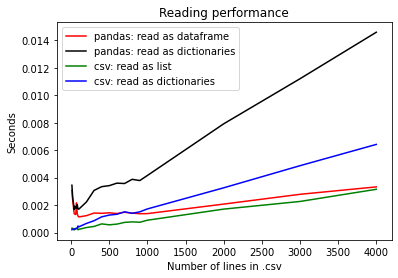

In [66]:
scale = 22

plt.plot(sizes[0:scale], reading_times_pandas[0:scale], "red", label="pandas: read as dataframe")
plt.plot(sizes[0:scale], reading_times_pandas_dict[0:scale], "black", label="pandas: read as dictionaries")
plt.plot(sizes[0:scale], reading_times_csv[0:scale], "green", label="csv: read as list")
plt.plot(sizes[0:scale], reading_times_csv_dict[0:scale], "blue", label="csv: read as dictionaries")

plt.title("Reading performance")
plt.xlabel("Number of lines in .csv")
plt.ylabel("Seconds", )

plt.ticklabel_format(style='plain')
plt.legend()

## Visualize reading performance for 10 .. 1'000'000 lines CSV file

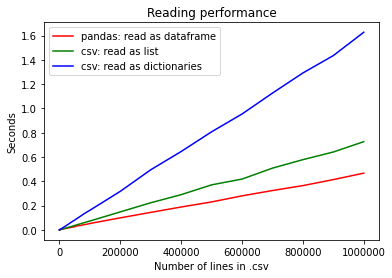

In [69]:
plt.plot(sizes, reading_times_pandas, "red", label="pandas: read as dataframe")
# plt.plot(sizes, reading_times_pandas_dict, "black", label="pandas: read as dictionaries")
plt.plot(sizes, reading_times_csv, "green", label="csv: read as list")
plt.plot(sizes, reading_times_csv_dict, "blue", label="csv: read as dictionaries")

plt.title("Reading performance")
plt.xlabel("Number of lines in .csv")
plt.ylabel("Seconds")

plt.ticklabel_format(style='plain')
plt.legend()

## Visualize writing performance

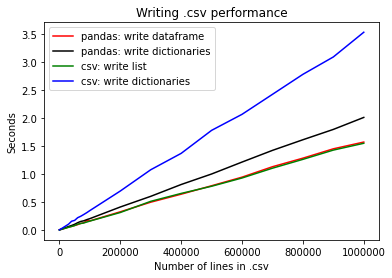

In [68]:
plt.plot(sizes, writing_times_pandas, "red", label="pandas: write dataframe")
plt.plot(sizes, writing_times_pandas_dict, "black", label="pandas: write dictionaries")
plt.plot(sizes, writing_times_csv, "green", label="csv: write list")
plt.plot(sizes, writing_times_csv_dict, "blue", label="csv: write dictionaries")

plt.title("Writing .csv performance")
plt.xlabel("Number of lines in .csv")
plt.ylabel("Seconds")

plt.ticklabel_format(style='plain')
plt.legend()

# Conclusion

## Reading performance:

1. csv.reader and csv.DictReader have the same performance on reading
2. csv.reader & csv.DictReader are faster than pandas.read_csv for < 5000 lines .csv file
3. When the csv size exceedes 5000 lines, the performance of csv.reader & csv.DictReader drop significant, compared to Pandas module. In general, pandas is faster than csv.reader & csv.DictReader for large .csv file (>5000 lines) 

## Writing performance

1. csv.DictWriter has the worst performance, compared to csv.writer and pandas.DataFrame.to_csv
2. csv.writer and pandas.DataFrame.to_csv have the same performance

## Should I use Pandas or CSV ?

1. Different from csv, pandas is not a build-in module and has to be installed manually. In general, this is considered a disadvantage of pandas, because it increases the dependency size of the project

2. csv is appropriate for small size csv.

3. When it comes to data analytics, pandas is a better choice, compared to csv. It provides many methods, i.e. the DataFrame, Series, etc. to manipulate the data. Furthermore, pandas uses NumPy under the hood (written 50 - 50 in C and Python), which significantly optimizes the performance.



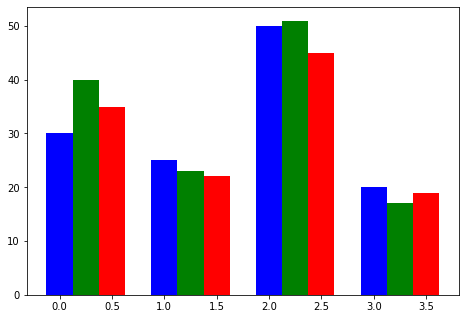

In [23]:
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)
langs = ['C', 'C++', 'Java', 'Python', 'PHP']

In [21]:
X

array([0, 1, 2, 3])

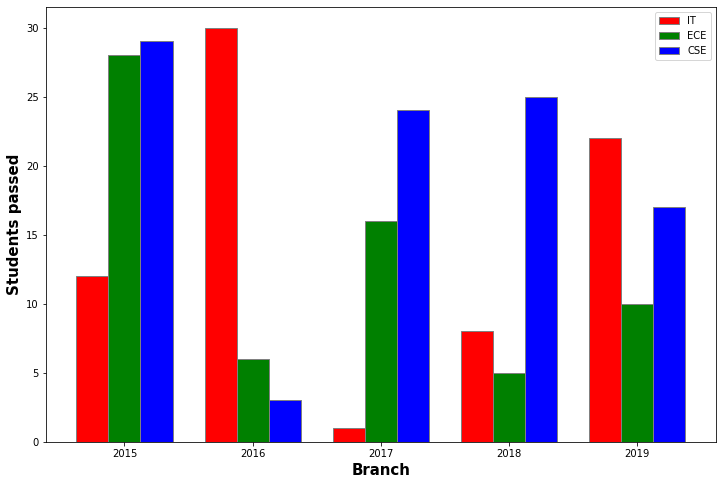

In [25]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
IT = [12, 30, 1, 8, 22]
ECE = [28, 6, 16, 5, 10]
CSE = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,
        edgecolor ='grey', label ='IT')
plt.bar(br2, ECE, color ='g', width = barWidth,
        edgecolor ='grey', label ='ECE')
plt.bar(br3, CSE, color ='b', width = barWidth,
        edgecolor ='grey', label ='CSE')
 
# Adding Xticks
plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        ['2015', '2016', '2017', '2018', '2019'])
 
plt.legend()
plt.show()

In [102]:
sizes = calculator.sizes
with open("values.txt", mode='r') as reader:
    reading_performances_raw = []
    for count in range(0, 4):
        line = reader.readline().split(" ")[:-1]
        reading_performances_raw.append(list(map(float, line)))

    writing_performances_raw = []
    for count in range(0, 4):
        line = reader.readline().split(" ")[:-1]
        writing_performances_raw.append(list(map(float, line)))
    
expected_sizes = [10, 100, 1000, 10000, 100000, 1000000, 2000000]

reading_performances = []
for performances in reading_performances_raw:
    reading_performances.append([])
    for index, val in enumerate(performances):
        if sizes[index] in expected_sizes:
            reading_performances[-1].append(val)
            
writing_performances = []
for performances in writing_performances_raw:
    writing_performances.append([])
    for index, val in enumerate(performances):
        if sizes[index] in expected_sizes:
            writing_performances[-1].append(val)
            

In [153]:
def draw_reading_bar(start: int, end: int):
    # set width of bar
    barWidth = 0.2
    fig = plt.subplots(figsize =(10, 12))

    # set height of bar
    reading_pd = reading_performances[0][start: end]
    reading_csv = reading_performances[1][start: end]
    # reading_pd_dict = reading_performances[2][start: end]
    reading_csv_dict = reading_performances[3][start: end]

    # Set position of bar on X axis
    br1 = np.arange(len(reading_pd))
    br2 = [x + barWidth for x in br1]
    # br3 = [x + barWidth for x in br2]
    br4 = [x + barWidth for x in br2]

    # Make the plot
    plt.bar(br1, reading_pd, color ='r', width = barWidth,
            edgecolor ='grey', label ='pd: default reading')

    plt.bar(br2, reading_csv, color ='g', width = barWidth,
            edgecolor ='grey', label ='csv: default reading')
    
    # plt.bar(br3, reading_pd_dict, color ='b', width = barWidth,
    #         edgecolor ='grey', label ='pd: dictionaries reading')

    plt.bar(br4, reading_csv_dict, color ='black', width = barWidth,
            edgecolor ='grey', label ='csv: dictionaries reading')

    # Adding Xticks
    plt.xlabel('Number of lines in .csv', fontweight ='bold', fontsize = 14)
    plt.ylabel('Seconds', fontweight ='bold', fontsize = 14)
    plt.xticks([r + barWidth for r in range(len(reading_pd))],
            expected_sizes[start: end], fontsize=15)

    plt.yticks(fontsize=15)
    plt.title("Reading performances", fontsize=15, fontweight='bold')

    plt.legend()
    plt.show()

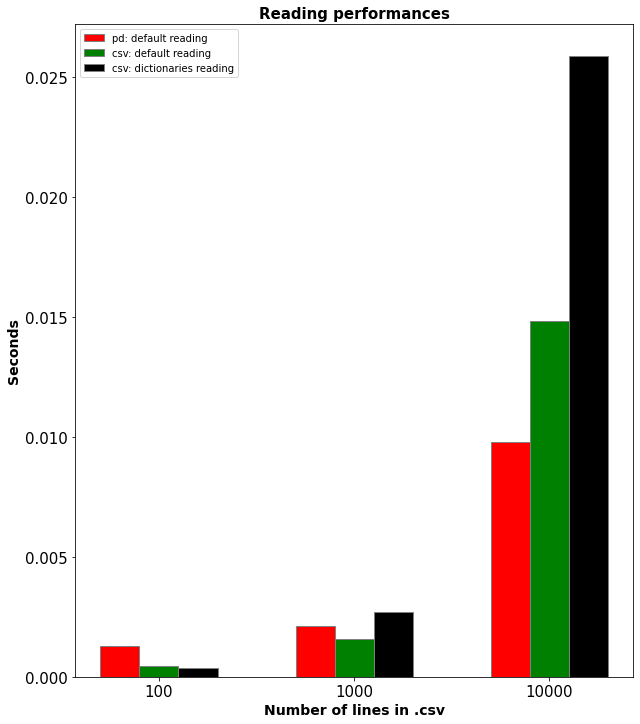

In [154]:
draw_reading_bar(1, 4)

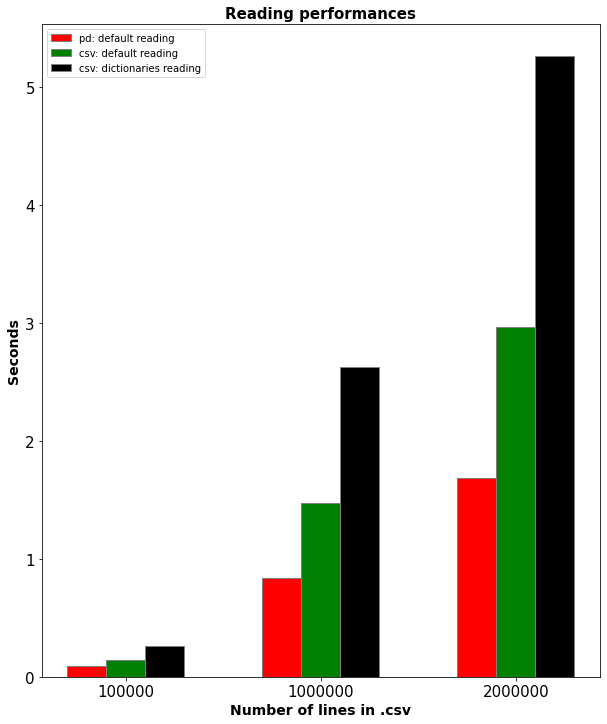

In [156]:
draw_reading_bar(4, 7)

In [139]:
def draw_writing_bar(start: int, end: int):    
    # set width of bar
    barWidth = 0.2
    fig = plt.subplots(figsize =(10, 12))

    # set height of bar
    writing_pd = writing_performances[0][start: end]
    writing_csv = writing_performances[1][start: end]
    # writing_pd_dict = writing_performances[2][start: end]
    writing_csv_dict = writing_performances[3][start: end]

    # Set position of bar on X axis
    br1 = np.arange(len(writing_pd))
    br2 = [x + barWidth for x in br1]
    # br3 = [x + barWidth for x in br2]
    br4 = [x + barWidth for x in br2]

    # Make the plot
    plt.bar(br1, writing_pd, color ='r', width = barWidth,
            edgecolor ='grey', label ='pd: default writing')
    plt.bar(br2, writing_csv, color ='g', width = barWidth,
            edgecolor ='grey', label ='csv: default writing')
    # plt.bar(br3, writing_pd_dict, color ='b', width = barWidth,
    #         edgecolor ='grey', label ='pd: dictionaries writing')

    plt.bar(br4, writing_csv_dict, color ='black', width = barWidth,
            edgecolor ='grey', label ='csv: dictionaries writing')

    # Adding Xticks
    plt.xlabel('Number of lines in .csv', fontweight ='bold', fontsize = 14)
    plt.ylabel('Seconds', fontweight ='bold', fontsize = 14)
    plt.xticks([r + barWidth for r in range(len(writing_pd))],
            expected_sizes[start: end], fontsize=15)

    plt.yticks(fontsize=14)

    plt.title("Writing performances", fontsize=15, fontweight='bold')
    plt.legend()
    plt.show()

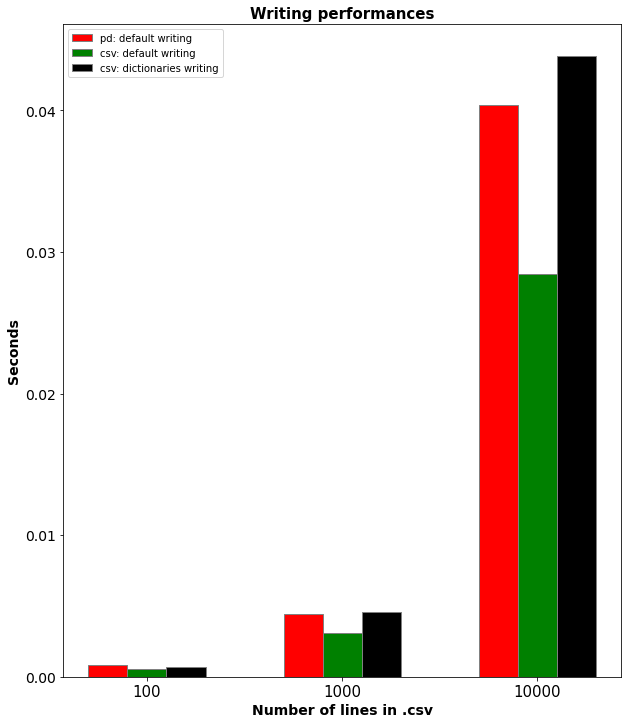

In [140]:
draw_writing_bar(1, 4)

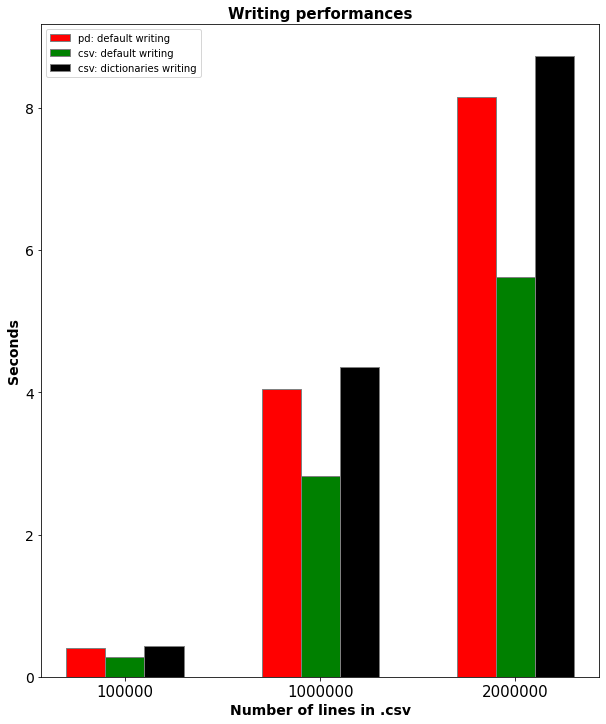

In [141]:
draw_writing_bar(4, 7)

In [122]:
import pandas as pd

data = pd.read_csv("sample-input.csv")
print(type(data))
print(data)

<class 'pandas.core.frame.DataFrame'>
       name  age     sex
0       Loc   22    male
1        An   21  female
2       Nam   33    male
3     Chino   11  female
4    Kokoto   12    male
5   Stephen   34    male
6     Curry   14  female
7      Klay   23    male
8    Petter   43    male
9    Parker   34    male
10     Lily   28  female
11   Potter   25    male
12     Nhan   22    male
13  Michael   56  female
14  Jackson   32    male
15    Stark   43    male


In [126]:
import pandas as pd

data = pd.DataFrame(
    {
        'name': ['Loc', 'An', 'Nam'], 
        'age': [22, 19, 25], 
        'sex': ['male', 'male', 'female']
    }
)
data.to_csv("sample-output.csv", index=False)
